## Librerias a utilizar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from scipy import stats
from fitter import Fitter, get_common_distributions
from scipy.stats import lognorm
import lxml
import html5lib

## Paso 1. Planteamiento del problema y recopilación de datos

- Comprensión empresarial
Los depósitos a largo plazo permiten a los bancos retener dinero durante un período de tiempo específico, lo que permite al banco utilizar ese dinero para mejorar sus inversiones. Las campañas de marketing de este producto se basan en llamadas telefónicas. Si un usuario no se encuentra disponible en un momento dado, entonces se le volverá a llamar de nuevo en otro momento.

- Descripción del problema
El banco portugués está teniendo una disminución en sus ingresos, por lo que quieren poder identificar a los clientes existentes que tienen una mayor probabilidad de contratar un depósito a largo plazo. Esto permitirá que el banco centre sus esfuerzos de marketing en esos clientes y evitará perder dinero y tiempo en clientes que probablemente no se suscribirán.

Para abordar este problema crearemos un algoritmo de clasificación que ayude a predecir si un cliente contratará o no un depósito a largo plazo.

In [2]:
data_bank=pd.read_csv('C:/Users/gfern/OneDrive/Escritorio/4GeeksAcademy/First-ML-Algorithm/data/raw/data_bank.csv',sep=';')
data_bank_orig=pd.read_csv('C:/Users/gfern/OneDrive/Escritorio/4GeeksAcademy/First-ML-Algorithm/data/raw/data_bank.csv',sep=';')
data_bank.head(15)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
data_bank['poutcome'].value_counts()
#reviews.groupby(['country', 'province'])

poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64

In [4]:
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
data_bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
data_bank.dtypes.value_counts()

object     11
int64       5
float64     5
Name: count, dtype: int64

In [7]:
print(data_bank.shape)

(41188, 21)


## Paso 2. Exploracion y limpieza de datos

El DataSet consta de **41188 registros**, 21 columnas con la siguiente distribucion y dtypes: 11 tipo object, 5 tipo int64 y 5 float64. Entre las columnas se encuentra la clase a predecir: **y**. No se detectaron datos o registros nulos.

Se detectaron 12 registros duplicados, eliminandose del DataSet. En estos momentos he decidido eliminar algunas variables que no tienen a mi juicio ingerencia sobre el objetivo o clase a predecir, las mismas son: default (8596 valores unknown, nos quedan dos campos similares housing y loan), day_of_week, previous (86% de los valores en cero), pdays y nr.employed.  

##### Registros Nulos

In [8]:
data_bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
filas_dup=data_bank[data_bank.duplicated()]
filas_dup

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


##### Datos Duplicados

In [10]:
data_bank.drop_duplicates(inplace=True)
data_bank_orig.drop_duplicates(inplace=True)
print(data_bank_orig.shape)

(41176, 21)


In [11]:
filas_dup=data_bank[data_bank.duplicated()]
filas_dup

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [12]:
cols_drop=['default','day_of_week','pdays','nr.employed','poutcome','previous']

In [13]:
data_bank.drop(cols_drop,axis=1, inplace=True)
print(data_bank.shape)

(41176, 15)


##### DataSet seleecionado para hacer el analisis

In [14]:
data_bank.head()
print(data_bank.shape)

(41176, 15)


## Paso 3. Análisis de variables univariante

#### Análisis sobre variables categóricas

A continuacion se muestran graficos de Countplot para las variables: 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y'

El analisis de los countplots por cada variable arroja la siguiente informacion:

- <span style="color: magenta;">job:</span> Las profesiones se inclinan hacia admin. 10419, blue-collar 9253 y technician 6739. Comprenden aproximadamente el 64%. Existen 330 registros desconocidos.
- <span style="color: magenta;">marital:</span> Predomina la categoria married con 60% de los datos. Existen 80 registros desconocidos.
- <span style="color: magenta;">education:</span> Existe una dominancia de las personas con university.degree y high.school, ambos representan un 53%. Existen 1730 valores desconocidos (unknown).
- <span style="color: magenta;">housing:</span> Predomina la etiqueta 'yes' con 52%  de los valores. Existen 990 valores desconocidos.
- <span style="color: magenta;">loan:</span> Predomina La etiqueta 'no' con 82% de los datos. Existen 990 valores desconocidos.  
- <span style="color: magenta;">contact:</span> Predomina el celular como medio de contacto con el cliente, con 63% de los valores. No existen valores deconocidos. 
- <span style="color: magenta;">month:</span> Mayo predomina como ultimo mes de contacto con el cliente, con un valor de 33% de los datos. No sxisten valores deconocidos. 
- <span style="color: magenta;">y:</span> Esta variable representa la clase u objetivo, tipo categorica y predomina la etiqueta 'no', representando el 89% de los valores. Etiqueta 'yes' con 11%. No existen valores nulos o desconocidos.

Mas adelante se tomaran decisiones con los valores desconocidos encontrados en el analisis.

In [15]:
data_bank['y'].value_counts()

y
no     36537
yes     4639
Name: count, dtype: int64

In [16]:
# Variables tipo object
s = (data_bank.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'y']


##### Graficos Variables Categoricas

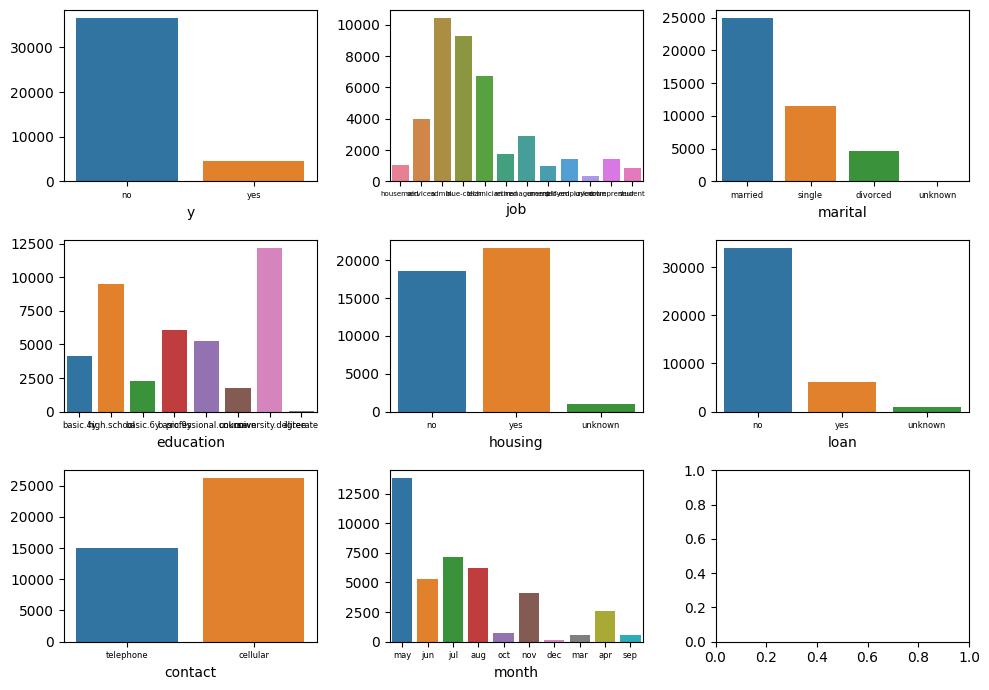

In [17]:
fig, axis = plt.subplots(3, 3, figsize = (10, 7))

# Crear un histograma múltiple
sns.countplot(ax = axis[0,0], data = data_bank, x = "y", hue='y').set(ylabel = None)
axis[0,0].set_xticklabels(axis[0,0].get_xticklabels(), fontsize='6')

sns.countplot(ax = axis[0,1], data = data_bank, x='job', hue='job').set(ylabel = None)
axis[0,1].set_xticklabels(axis[0,1].get_xticklabels(), fontsize='5') 

sns.countplot(ax = axis[0,2], data = data_bank, x = "marital", hue='marital').set(ylabel = None)
axis[0,2].set_xticklabels(axis[0,2].get_xticklabels(), fontsize='6') 

sns.countplot(ax = axis[1,0], data = data_bank, x = "education", hue='education').set(ylabel = None)
axis[1,0].set_xticklabels(axis[1,0].get_xticklabels(), fontsize='6') 

sns.countplot(ax = axis[1,1], data = data_bank, x = "housing", hue='housing').set(ylabel = None)
axis[1,1].set_xticklabels(axis[1,1].get_xticklabels(), fontsize='6') 

sns.countplot(ax = axis[1,2], data = data_bank, x = "loan", hue='loan').set(ylabel = None)
axis[1,2].set_xticklabels(axis[1,2].get_xticklabels(), fontsize='6') 

sns.countplot(ax = axis[2,0], data = data_bank, x = "contact", hue='contact').set(ylabel = None)
axis[2,0].set_xticklabels(axis[2,0].get_xticklabels(), fontsize='6') 

sns.countplot(ax = axis[2,1], data = data_bank, x = "month", hue='month').set(ylabel = None)
axis[2,1].set_xticklabels(axis[2,1].get_xticklabels(), fontsize='6') 


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [18]:
s = (data_bank.dtypes == 'int64')
s1=(data_bank.dtypes == 'float64')
object_cols = list(s[s].index)
object_cols1=list(s1[s1].index)
print("Numerical variables:")
print(object_cols,object_cols1)

Numerical variables:
['age', 'duration', 'campaign'] ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']


### Análisis sobre variables numéricas
Las variables numericas esta representadas por: age, duration, campaign, previous, cons.price.idx y cons.conf.idx. A continuacion se haran analisis graficos para cada una de las variables, con el objeto de inferir datos de relevancia. 

- <span style="color: magenta;">age:</span> La variable age tiene un sesgo positivo y valores atipicos que se deben revisar mas adelante, por ejemplo, se tiene un valor maximo de 98. La media es 40 y con mediana de 38, evidenciandose un sesgo o asimetria positiva. El 75% de los datos se encuentran entre 17 y 47.

- <span style="color: magenta;">duration:</span> La variable duration tiene un sesgo positivo y valores atipicos que se deben revisar mas adelante en la seccion de ingenieria de caracterisiticas, por ejemplo, se tiene un valor maximo de 4918 seg. La media es 258 y con mediana de 180, evidenciandose un sesgo o asimetria positiva. El 75% de los datos se encuentran entre 0 y 319. Deben revisarse los valores en 0, los cuales representan solo 4 registros.

- <span style="color: magenta;">campaign:</span> La variable campaign tiene un sesgo positivo y valores atipicos que se deben revisar mas adelante en la seccion de ingenieria de caracterisiticas, por ejemplo, se tiene un valor maximo de 56. La media es 2.57 y con mediana de 2, evidenciandose un sesgo o asimetria positiva. El 75% de los datos se encuentran entre 1 y 3. 

- <span style="color: magenta;">cons.price.idx:</span> La variable cons.price.idx tiene un sesgo negativo, no posee valores atipicos. La media es 93.6 y con mediana de 93.7. El 75% de los datos se encuentran entre 92.2 y 93.9. Son los datos que mas se han asemejado a una curva normal. 

- <span style="color: magenta;">cons.conf.idx:</span> La variable cons.conf.idx posee pocos valores atipicos. La media es -40.5 y con mediana de -41.8. El 75% de los datos se encuentran entre -50.8 y -36.4. 

- <span style="color: magenta;">emp.var.rate:</span> La variable emp.var.rate no posee valores atipicos. La media es 0.082 y con mediana de 1.1. Casi el 60% de los datos esta por encima de 1.

- <span style="color: magenta;">euribor3m:</span> La variable euribor3m no posee valores atipicos. La media es 3.62 y con mediana de 4.86. Casi el 24% de los datos esta por encima de 4.961.

In [19]:
data_bank['euribor3m'].describe()

count    41176.000000
mean         3.621293
std          1.734437
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64

<Axes: xlabel='emp.var.rate', ylabel='Count'>

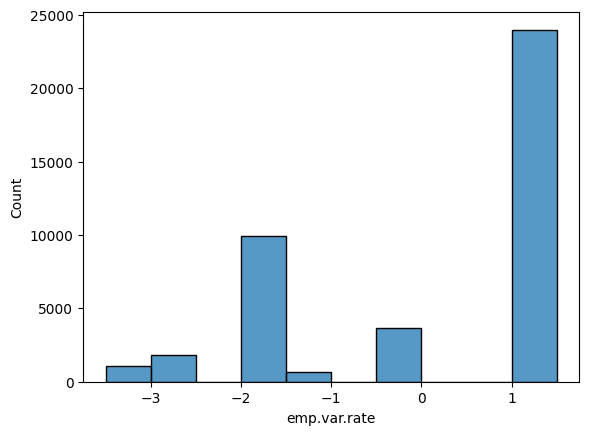

In [20]:
bins=(-3.5,-3,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5)
sns.histplot(data=data_bank,x='emp.var.rate',bins=(-3.5,-3,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5))


[Text(0.5, 0, ''), Text(0, 0.5, '')]

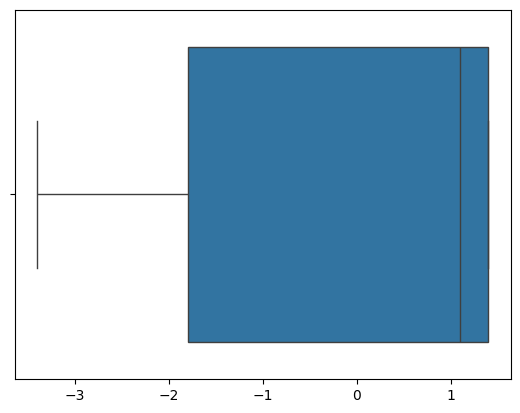

In [21]:
sns.boxplot(data = data_bank, x = "emp.var.rate").set(xlabel = None, ylabel = None)


In [22]:
data_bank.loc[data_bank.duration==0]

,age,job,marital,education,housing,loan,contact,month,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
6251,39,admin.,married,high.school,yes,no,telephone,may,0,4,1.1,93.994,-36.4,4.857,no
23031,59,management,married,university.degree,yes,no,cellular,aug,0,10,1.4,93.444,-36.1,4.965,no
28063,53,blue-collar,divorced,high.school,yes,no,cellular,apr,0,3,-1.8,93.075,-47.1,1.479,no
33015,31,blue-collar,married,basic.9y,no,no,cellular,may,0,2,-1.8,92.893,-46.2,1.299,no


In [23]:
data_bank.loc[data_bank.duration<1050]

,age,job,marital,education,housing,loan,contact,month,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,261,1,1.1,93.994,-36.4,4.857,no
1,57,services,married,high.school,no,no,telephone,may,149,1,1.1,93.994,-36.4,4.857,no
2,37,services,married,high.school,yes,no,telephone,may,226,1,1.1,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,telephone,may,151,1,1.1,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,yes,telephone,may,307,1,1.1,93.994,-36.4,4.857,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,cellular,nov,334,1,-1.1,94.767,-50.8,1.028,yes
41184,46,blue-collar,married,professional.course,no,no,cellular,nov,383,1,-1.1,94.767,-50.8,1.028,no
41185,56,retired,married,university.degree,yes,no,cellular,nov,189,2,-1.1,94.767,-50.8,1.028,no
41186,44,technician,married,professional.course,no,no,cellular,nov,442,1,-1.1,94.767,-50.8,1.028,yes


In [24]:
data_bank.loc[data_bank['cons.conf.idx']>-30]

,age,job,marital,education,housing,loan,contact,month,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
37887,53,admin.,married,university.degree,yes,no,cellular,sep,81,5,-3.4,92.379,-29.8,0.819,no
37888,32,admin.,single,university.degree,yes,yes,cellular,sep,69,2,-3.4,92.379,-29.8,0.819,no
37889,52,admin.,married,unknown,no,no,telephone,sep,97,5,-3.4,92.379,-29.8,0.819,no
37890,39,entrepreneur,married,basic.6y,yes,no,cellular,sep,265,2,-3.4,92.379,-29.8,0.819,yes
37891,32,admin.,single,university.degree,yes,no,cellular,sep,157,2,-3.4,92.379,-29.8,0.819,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38596,69,retired,married,basic.4y,yes,yes,cellular,oct,257,3,-3.4,92.431,-26.9,0.720,yes
38597,18,student,single,basic.6y,no,yes,cellular,oct,368,2,-3.4,92.431,-26.9,0.720,yes
38598,59,retired,divorced,basic.4y,yes,no,telephone,oct,152,4,-3.4,92.431,-26.9,0.720,no
38599,37,admin.,single,university.degree,no,no,cellular,oct,416,2,-3.4,92.431,-26.9,0.720,yes


In [25]:
for col in data_bank.columns:
    if data_bank[col].dtype!='object':
        print(col)

age
duration
campaign
emp.var.rate
cons.price.idx
cons.conf.idx
euribor3m


##### Graficos Variables Numericas

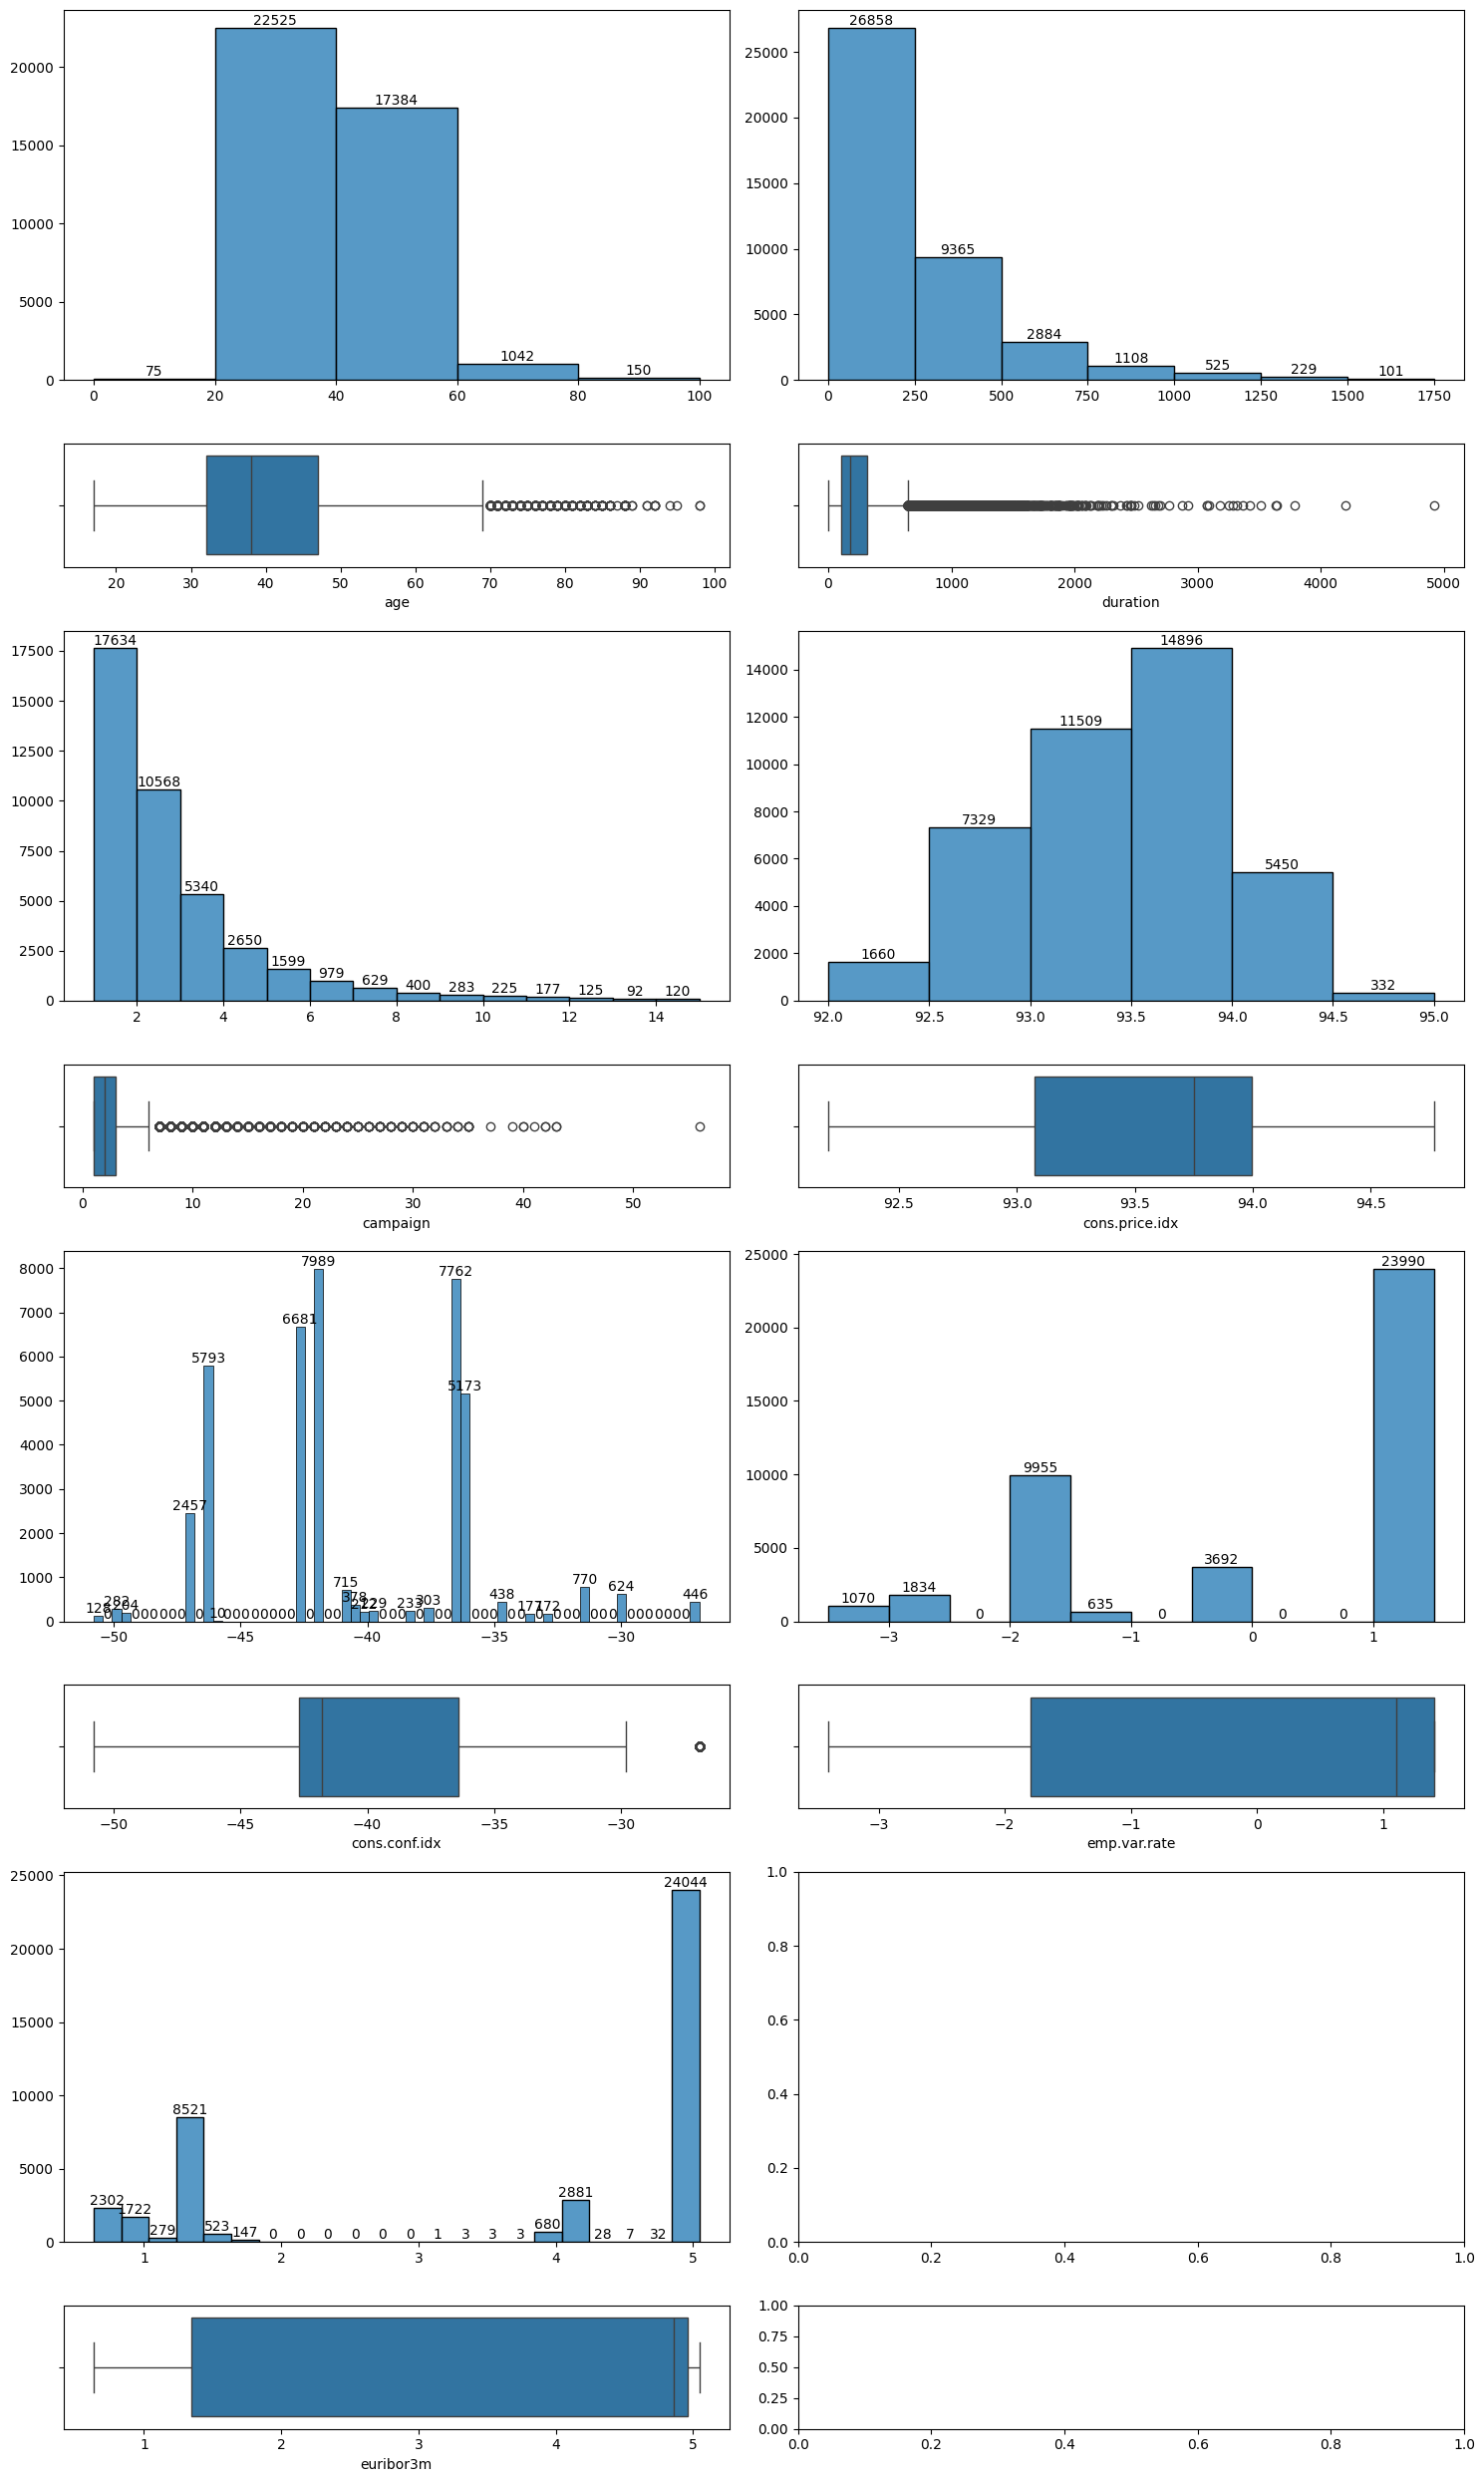

In [26]:
fig, axis = plt.subplots(8, 2, figsize = (15, 25), gridspec_kw={'height_ratios': [6,2,6,2,6,2,6,2]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = data_bank, x = "age",bins=(0,20,40,60,80,100)).set(xlabel = None, ylabel = None)
axis[0,0].bar_label(axis[0,0].containers[0])
sns.boxplot(ax = axis[1, 0], data = data_bank, x = "age")

bin_edges = [0, 250, 500, 750, 1000, 1250,1500,1750, float('inf')]
sns.histplot(ax = axis[0, 1], data = data_bank, x = "duration", bins=bin_edges).set(xlabel = None, ylabel = None)
axis[0,1].bar_label(axis[0,1].containers[0])
sns.boxplot(ax = axis[1, 1], data = data_bank, x = "duration")


sns.histplot(ax = axis[2, 0], data = data_bank, x = "campaign",bins=(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15)).set(xlabel = None, ylabel = None)
axis[2,0].bar_label(axis[2,0].containers[0])
sns.boxplot(ax = axis[3, 0], data = data_bank, x = "campaign")

sns.histplot(ax = axis[2, 1], data = data_bank, x = "cons.price.idx",bins=(92,92.5,93,93.5,94,94.5,95)).set(xlabel = None, ylabel = None)
axis[2,1].bar_label(axis[2,1].containers[0])
sns.boxplot(ax = axis[3, 1], data = data_bank, x = "cons.price.idx")

sns.histplot(ax = axis[4, 0], data = data_bank, x = "cons.conf.idx").set(xlabel = None, ylabel = None)
axis[4,0].bar_label(axis[4,0].containers[0])
sns.boxplot(ax = axis[5, 0], data = data_bank, x = "cons.conf.idx")

sns.histplot(ax = axis[4, 1], data = data_bank, x = "emp.var.rate",bins=(-3.5,-3,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5)).set(xlabel = None, ylabel = None)
axis[4,1].bar_label(axis[4,1].containers[0])
sns.boxplot(ax = axis[5, 1], data = data_bank, x = "emp.var.rate")

sns.histplot(ax = axis[6, 0], data = data_bank, x = "euribor3m").set(xlabel = None, ylabel = None)
axis[6,0].bar_label(axis[6,0].containers[0])
sns.boxplot(ax = axis[7, 0], data = data_bank, x = "euribor3m")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

## Paso 4. Análisis de variables multivariante

### Análisis Variable Objetivo - Predictoras Numéricas
Se va a comparar la variable objetivo **'y'** con las variables numericas predictoras: age, duration, campaign, emp.var.rate, cons.price.idx, cons.conf.idx y euribor3m.

**Principales conclusiones:**
- En los graficos tipo barplot que se hicieron se observa como las variables **(duration, emp.var.rate y euribor3m)** estan relacionadas con la respuesta **yes** o **no**, en relacion a la toma de los depositos a largo plazo, lo cual, con los graficos de correlación se demuestra mas adelante. Por ejemplo, si analizamos la variable **'age'** en el grafico de barplot, se observa que la edad promedio de las personas que decidieron tomar los depositos a largo plazo es de 40 años aproximadamente, esta misma edad promedio tambien la presentaron las personas que **no** decidieron tomar estos depositos, por lo cual, se podria suponer que esta variable no se correlaciona con la variable objetivo **y**.

- La variable que mas se relaciona con la **clase y**, es **duration**, con una correlacion de 0.41. En relacion a las otras variables, existe una correlacion negativa con **emp.var.rate de -0.30 y con euribor3m de -0.31**. El resto de las correlaciones son muy bajas. 


In [27]:
# Factorizamos la variable objetivo para poder hacer las comparaciones contra las variables numericas

data_bank["y_n"] = pd.factorize(data_bank["y"])[0]


##### Graficos Variable Objetivo y Variables Numericas

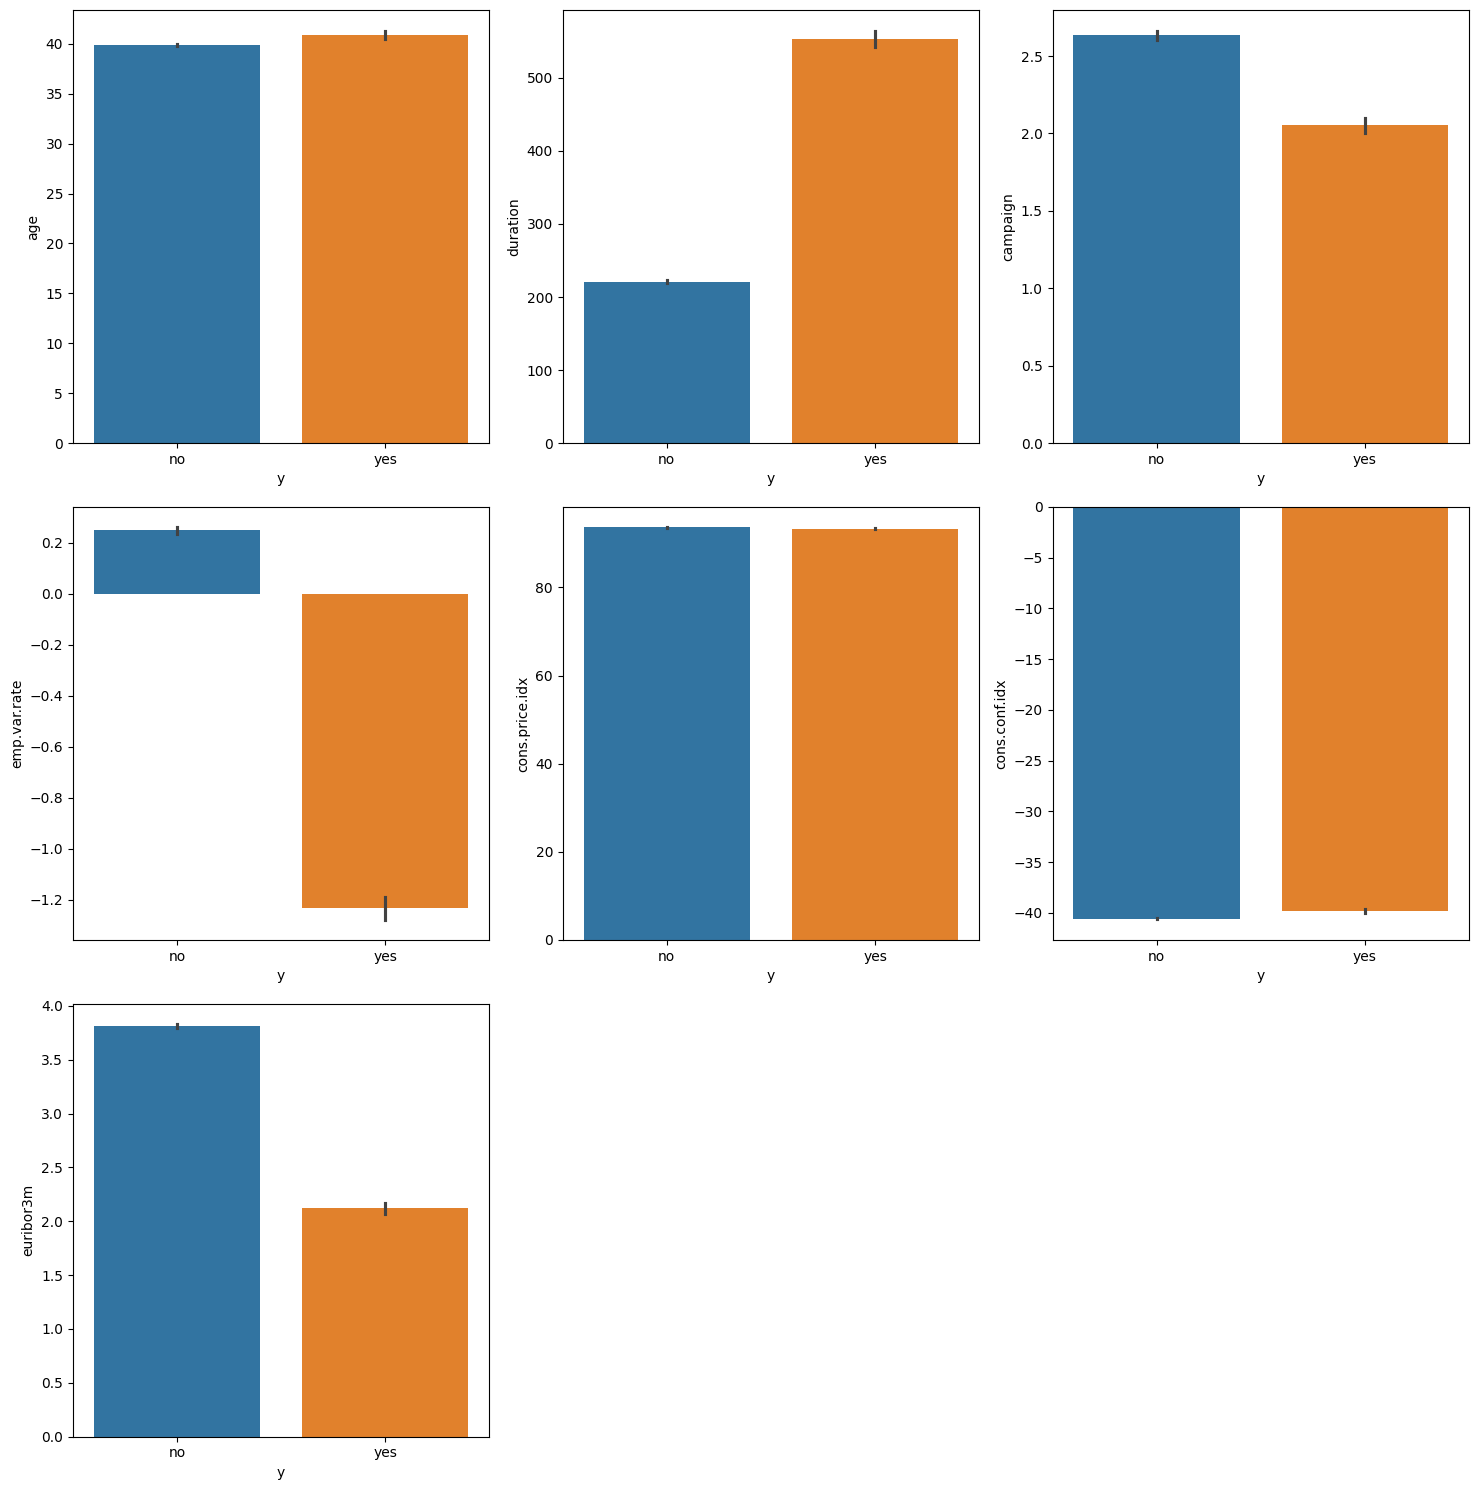

In [28]:
fig, axis = plt.subplots(3, 3, figsize = (15, 15))

sns.barplot(ax = axis[0, 0], data = data_bank, y ='age',x='y', hue = 'y')
sns.barplot(ax = axis[0, 1], data = data_bank, y = 'duration',x='y', hue = "y")
sns.barplot(ax = axis[0, 2],data=data_bank,y='campaign',x='y', hue='y' )
sns.barplot(ax = axis[1,0],data=data_bank,y = 'emp.var.rate',x='y',hue='y' )
sns.barplot(ax = axis[1, 1], data = data_bank, y = 'cons.price.idx',x='y', hue = "y")
sns.barplot(ax = axis[1, 2],data=data_bank,y='cons.conf.idx',x='y', hue='y' )
sns.barplot(ax = axis[2,0],data=data_bank,y = 'euribor3m',x='y',hue='y' )

plt.tight_layout()
fig.delaxes(axis[2,1])
fig.delaxes(axis[2,2])

plt.show()

##### Grafico Correlaciones Variable Objetivo y Numericas

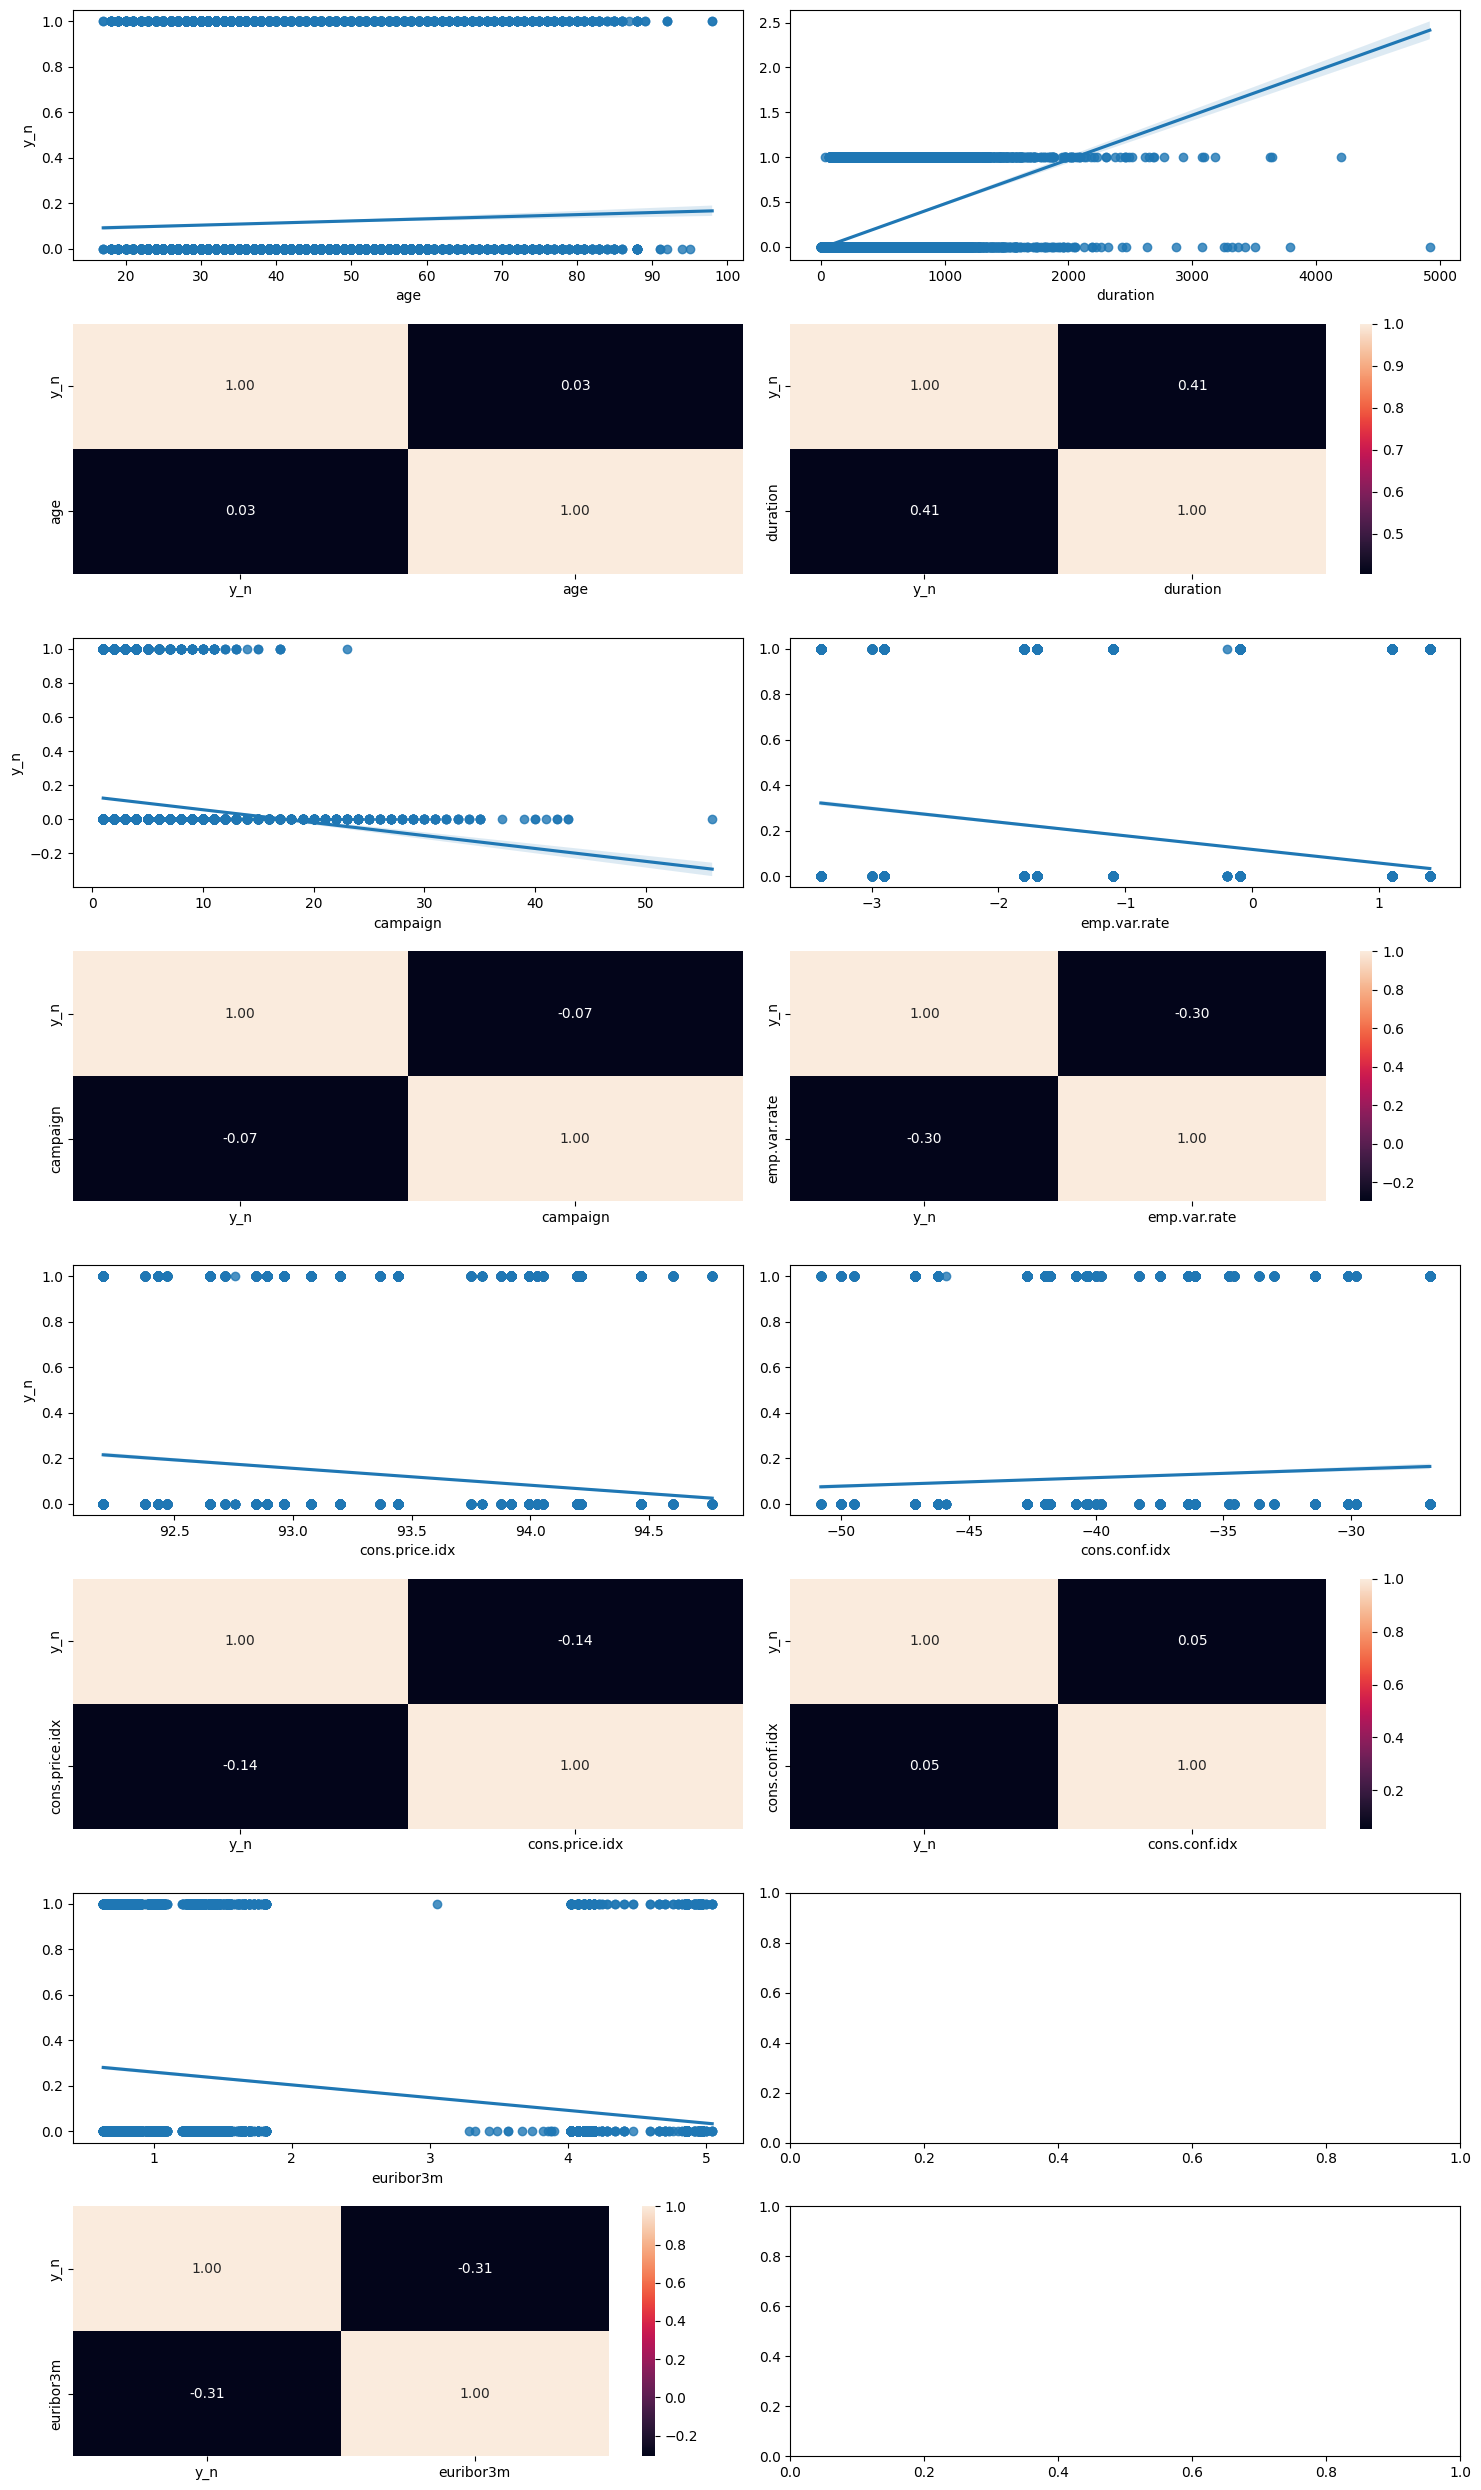

In [29]:
fig, axis = plt.subplots(8, 2, figsize = (15, 25))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = data_bank, x = "age", y = "y_n")
sns.heatmap(data_bank[["y_n", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = data_bank, x = "duration", y = "y_n").set(ylabel=None)
sns.heatmap(data_bank[["y_n", "duration"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = data_bank, x = "campaign", y = "y_n")
sns.heatmap(data_bank[["y_n", "campaign"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)
sns.regplot(ax = axis[2, 1], data = data_bank, x = "emp.var.rate", y = "y_n").set(ylabel=None)
sns.heatmap(data_bank[["y_n", "emp.var.rate"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])

sns.regplot(ax = axis[4, 0], data = data_bank, x = "cons.price.idx", y = "y_n")
sns.heatmap(data_bank[["y_n", "cons.price.idx"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 0], cbar = False)
sns.regplot(ax = axis[4, 1], data = data_bank, x = "cons.conf.idx", y = "y_n").set(ylabel=None)
sns.heatmap(data_bank[["y_n", "cons.conf.idx"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 1])

sns.regplot(ax = axis[6, 0], data = data_bank, x = "euribor3m", y = "y_n").set(ylabel=None)
sns.heatmap(data_bank[["y_n", "euribor3m"]].corr(), annot = True, fmt = ".2f", ax = axis[7, 0])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

### Analisis Categorico - Categorico

En esta seccion de haran graficos tipo countplot, colocando en el eje X las variables categoricas predictoras y cruzandolas con la clase **y**, para poder visualizar alguna relacion entre las mismas. Finalmente, se hara un heatmap para ver el factor de correlacion entre las variables categoricas y la clase **y**, e incluso entre las mismas variables categoricas. 

- En los graficos de countplot se observo que las variables housing y loan, presentan una distribucion de datos parecidas, lo que podria suponer una correlacion. Por otro lado, las variables marital y contact, podrian guardar una relacion aparentemente con la variable a predecir **'y'**, lo cual debe comprobarse con el calculo de las correlaciones.

- Despues de determinar la matriz de correlaciones, puede observarse que la variable objetivo **'y'**, guarda una correlacion baja (alrededor de 0.15) con las variables month y contact, pero a su vez estas dos presentan una correlacion media alrededor del 0.5, lo cual, podria conllevar a la eliminacion de algunas de las dos en el modelo. Al igual que las variables housing y loan, sus correlaciones estan cerca del 0.3, mas adelante se podria elegir a una de las dos. En terminos generales, las correlaciones de la variable clase y las variables categoricas seleccionadas, son bajas.



#### Graficos Variable Objetivo y Categoricas

In [30]:
for cols in data_bank.columns:
    if data_bank[cols].dtype=='object':
        print(cols,end=' ')

job marital education housing loan contact month y 

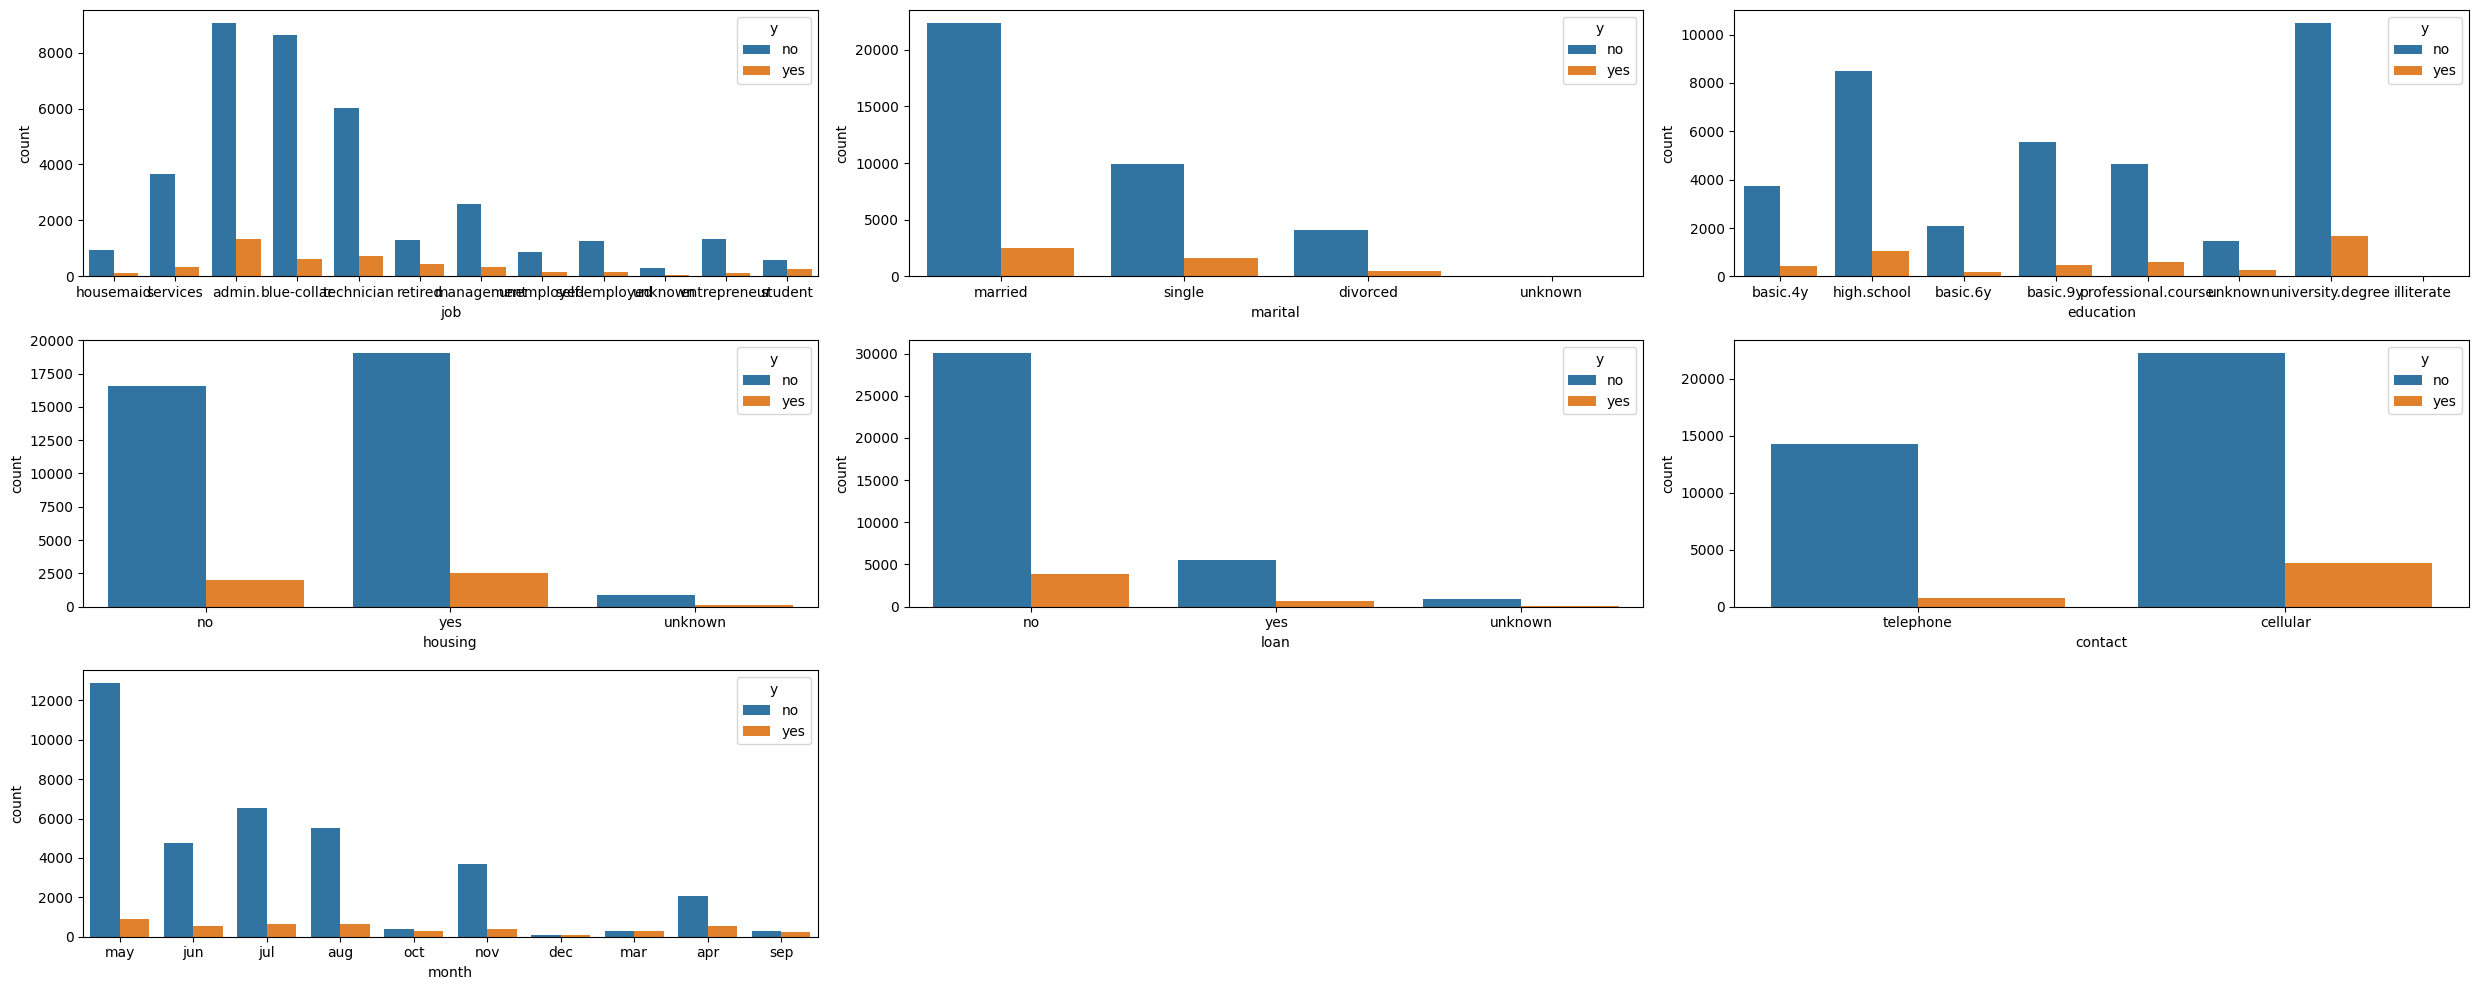

In [31]:
fig, axis = plt.subplots(3, 3, figsize = (25, 10))

sns.countplot(ax = axis[0, 0], data = data_bank, x ='job',hue = 'y')
sns.countplot(ax = axis[0, 1], data = data_bank, x = 'marital',hue = "y")
sns.countplot(ax = axis[0, 2],data=data_bank,x='education', hue='y' )
sns.countplot(ax = axis[1,0],data=data_bank, x = 'housing',hue='y' )
sns.countplot(ax = axis[1,1],data=data_bank, x = 'loan',hue='y' )
sns.countplot(ax = axis[1, 2], data = data_bank, x = 'contact', hue = "y")
sns.countplot(ax = axis[2, 0],data=data_bank,x='month', hue='y' )


plt.tight_layout()
fig.delaxes(axis[2,1])
fig.delaxes(axis[2,2])

plt.show()

#### Factorizacion

In [32]:
#job marital education housing loan contact month y 
data_bank["job_n"] = pd.factorize(data_bank["job"])[0]
data_bank["marital_n"] = pd.factorize(data_bank["marital"])[0]
data_bank["education_n"] = pd.factorize(data_bank["education"])[0]
data_bank["housing_n"] = pd.factorize(data_bank["housing"])[0]
data_bank["loan_n"] = pd.factorize(data_bank["loan"])[0]
data_bank["contact_n"] = pd.factorize(data_bank["contact"])[0]
data_bank["month_n"] = pd.factorize(data_bank["month"])[0]


#### Matriz de Correlacion de la Variable Clase y Variables Categoricas 

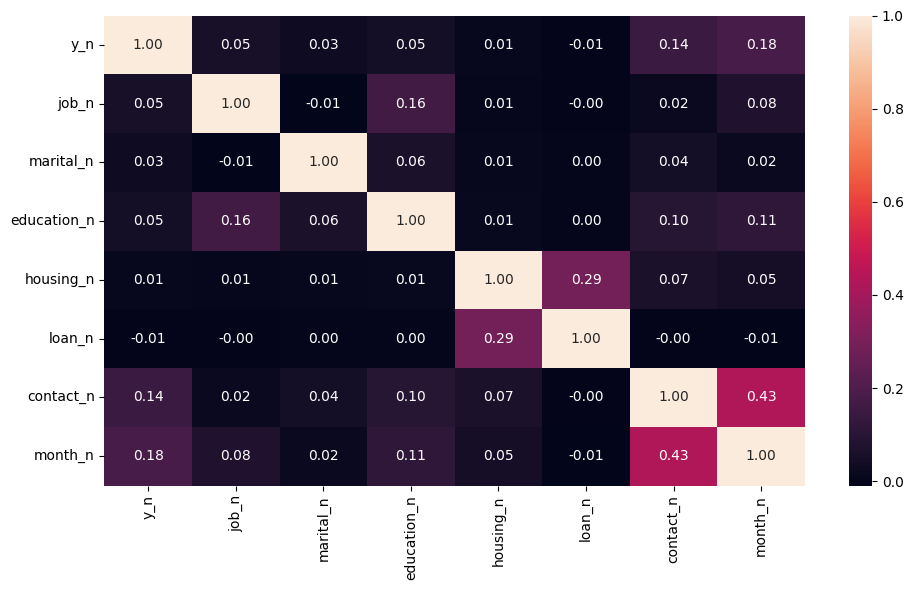

In [33]:
fig, axis = plt.subplots(figsize = (10, 6))
matriz_corr=data_bank[['y_n','job_n','marital_n', 'education_n', 'housing_n', 'loan_n', 'contact_n', 'month_n']].corr()

#print(matriz_corr)
sns.heatmap(matriz_corr, annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

## Paso 5. Ingenieria de Características

Como se menciono al inicio no se cuenta con valores nulos; sin embargo, existen algunos campos (job, marital, education, housing y loan) con valores desconocidos (unknown), vamos a revisarlos y tomar decisiones. Posteriormente, revisare los valores atipicos de las variables seleccionadas. 

- Primer paso. Voy a reemplazar las etiquetas unknown de las campos housing y loan, con datos de la columna default, es decir, si en default tengo una etiqueta con un valor de 'yes' y en housing o loan, esta marcado con unknown entonces reempalzo con el valor de yes. Terminada la transformacion reemplace el 77% de los valores unknown, el resto de los registros (227), fueron eliminados de la data.

- Para reemplazar los valores desconocidos del resto de las variables variables, se realizo lo siguiente:
    - job. Se reemplazaron con la etiqueta unemployed, para no alterar en gran medida la distribucion de los datos (generada por la frecuencia)
    - marital. Se reemplazaron con la etiqueta divorced, para no alterar la distribucion de los datos (generada por la ferecuencia)
    - education. Se reemplazaron con la etiqueta basic.6y, para no alterar la distribucion de los datos (generada por la ferecuencia)

Las columnas que presentan mas valores atipicos son: age, duration y campaign. Son los campos sobre los que estare trabajando.
    - Los valores atipicos de la variable age estan referidos en su mayoria (95%) a personas en retiro y trabajos en el hogar, en la realidad esto es viable, por lo cual, no eliminare ningun dato.
    - La cuantificacion de los valores atipicos para la variable duration, tiene un limite superior en 644.5, si tomamos este valor se estarian eliminando 2948 registros. Revisando los graficos para esta variable se podria tomar un limite sensato por encima de 1500, con lo cual estariamos eliminando 205 registros (0.5% de la data).
    - La variable campaign tiene un limite superior para calcular valores atipicos de 6, siguiendo este numero se eliminarian 2389 registros.Revisando el countplot de esta variable se podría tomar un valor de 15 como limite para los atipicos, eliminando 354 registros.   

In [34]:
print(data_bank.shape, data_bank_orig.shape)

(41176, 23) (41176, 21)


In [35]:
#data_bank.columns.get_loc('housing')
data_bank.columns.get_loc('loan')

5

In [36]:
# Reemplazo de registros unknown en housing y loan, con valores del campo default en data original

for fila in range(len(data_bank)):
    if data_bank.iloc[fila,4]=='unknown':
        data_bank.iloc[fila,4]=data_bank_orig.iloc[fila,4]
    if data_bank.iloc[fila,5]=='unknown':
        data_bank.iloc[fila,5]=data_bank_orig.iloc[fila,4]

In [37]:
data_bank.housing.value_counts()

housing
yes        21571
no         19378
unknown      227
Name: count, dtype: int64

In [38]:
# Eliminando los 227 registros unknown que estan en housing y loan

data_bank.drop(data_bank[data_bank['housing'] == 'unknown'].index, inplace=True)

In [39]:
print(data_bank.shape)

(40949, 23)


In [40]:
data_bank.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'duration', 'campaign', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'y', 'y_n', 'job_n', 'marital_n',
       'education_n', 'housing_n', 'loan_n', 'contact_n', 'month_n'],
      dtype='object')

#### Reempazo de los valores unknown

In [41]:
# Reemplazo valores unknown en job
for f in range(len(data_bank)):
    if data_bank.iloc[f,1] == 'unknown':
        data_bank.iloc[f,1] = 'unemployed'

for f in range(len(data_bank)):
    if data_bank.iloc[f,2] == 'unknown':
        data_bank.iloc[f,2] = 'divorced'

for f in range(len(data_bank)):
    if data_bank.iloc[f,3] == 'unknown':
        data_bank.iloc[f,3] = 'basic.6y'


#### Valores atipicos y tratamiento

In [42]:
for cols in data_bank.columns:
    if data_bank[cols].dtype!='object':
        print(cols,end=' ')

age duration campaign emp.var.rate cons.price.idx cons.conf.idx euribor3m y_n job_n marital_n education_n housing_n loan_n contact_n month_n 

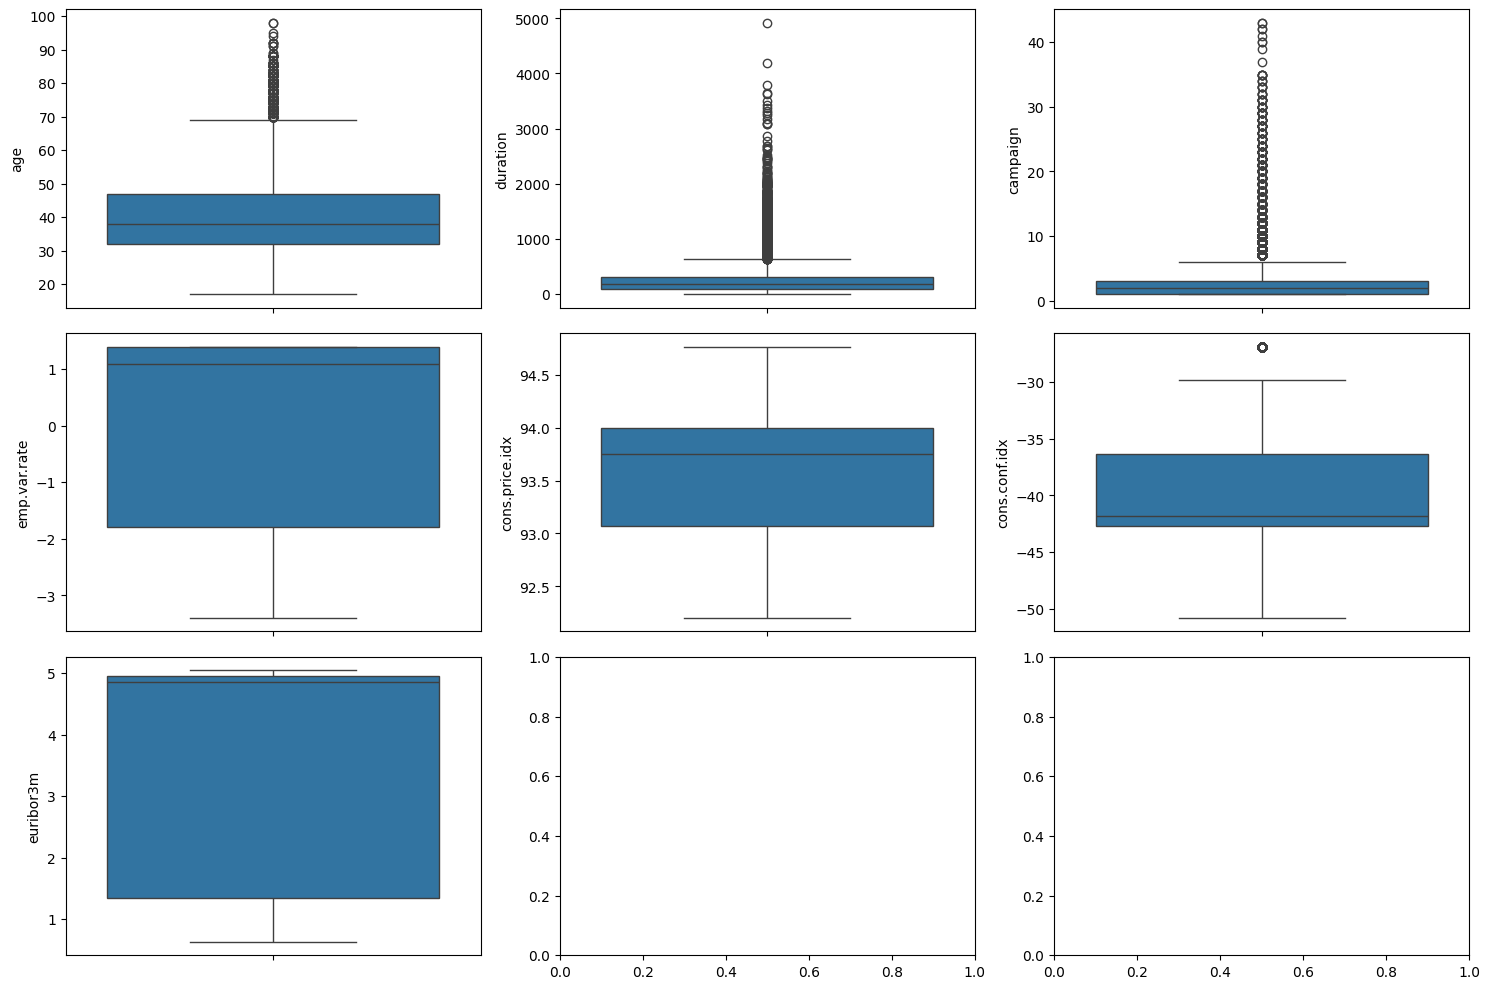

In [43]:
fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = data_bank, y = "age")
sns.boxplot(ax = axis[0, 1], data = data_bank, y = "duration")
sns.boxplot(ax = axis[0, 2], data = data_bank, y = "campaign")
sns.boxplot(ax = axis[1, 0], data = data_bank, y = "emp.var.rate")
sns.boxplot(ax = axis[1, 1], data = data_bank, y = "cons.price.idx")
sns.boxplot(ax = axis[1, 2], data = data_bank, y = "cons.conf.idx")
sns.boxplot(ax = axis[2, 0], data = data_bank, y = "euribor3m")

plt.tight_layout()

plt.show()


In [44]:
# Tratamiento Outliers variable age
age_d=data_bank['age'].describe()

age_iqr = age_d["75%"] - age_d["25%"]
upper_limit = age_d["75%"] + 1.5 * age_iqr
lower_limit = age_d["25%"] - 1.5 * age_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(age_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 69.5 y 9.5, con un rango intercuartílico de 15.0


In [45]:
# Tratamiento Outliers variable duration, vamos a tomar como atipicos por encima de 1500, para preservar mas data
dur_d=data_bank['duration'].describe()

dur_iqr = dur_d["75%"] - dur_d["25%"]
upper_limit = dur_d["75%"] + 1.5 * dur_iqr
lower_limit = dur_d["25%"] - 1.5 * dur_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(dur_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 644.5 y -223.5, con un rango intercuartílico de 217.0


In [46]:
data_bank=data_bank.loc[data_bank['duration']<=1500]

In [47]:
print(data_bank.shape)

(40744, 23)


In [48]:
# Tratamiento Outliers variable campaign, vamos a tomar como atipicos por encima de 15
cam_d=data_bank['campaign'].describe()

cam_iqr = cam_d["75%"] - cam_d["25%"]
upper_limit = cam_d["75%"] + 1.5 * cam_iqr
lower_limit = cam_d["25%"] - 1.5 * cam_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(cam_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 6.0 y -2.0, con un rango intercuartílico de 2.0


In [49]:
data_bank=data_bank.loc[data_bank['campaign']<=15]

In [50]:
print(data_bank.shape)

(40390, 23)


In [51]:
data_bank.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'duration', 'campaign', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'y', 'y_n', 'job_n', 'marital_n',
       'education_n', 'housing_n', 'loan_n', 'contact_n', 'month_n'],
      dtype='object')

In [52]:
data_bank['y'].value_counts()

y
no     35895
yes     4495
Name: count, dtype: int64

## Paso 6. Selección de Características

En este momento tenemos 14 variables predictoras en nuestro dataframe X, con el cual, se determinaron Xtrain y Xtest. Existen variables que presentan correlaciones moderadas entre ellas. Por ejemplo: month, contact, housing y loan. Existen otras con correlaciones muy bajas. Pienso que puedo descartar como 7 variables y quedarme a trabajar con 7.

#### Balanceo de Variable Objetivo

Es necesario realizar dicha operacion dado que el 88,9% de los datos de la variable clase (objetivo), posee la etiqueta no, por lo cual, estariamos creando un modelo overfitting, no conveniente para nuestras estimaciones a futuro.

In [53]:
g = data_bank.groupby('y')
data_bal = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
data_bal.reset_index(drop=True,inplace=True)
data_bal


,age,job,marital,education,housing,loan,contact,month,duration,campaign,...,euribor3m,y,y_n,job_n,marital_n,education_n,housing_n,loan_n,contact_n,month_n
0,32,unemployed,married,basic.9y,no,no,cellular,aug,390,3,...,4.964,no,0,9,0,3,0,0,1,3
1,35,blue-collar,married,high.school,no,no,telephone,jun,344,2,...,4.864,no,0,3,0,1,0,0,0,1
2,35,technician,married,university.degree,yes,no,cellular,apr,90,3,...,1.405,no,0,4,0,6,1,0,1,8
3,49,services,married,high.school,yes,no,cellular,aug,234,8,...,4.965,no,0,1,0,1,1,0,1,3
4,33,technician,married,high.school,no,no,cellular,aug,108,1,...,4.966,no,0,4,0,1,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8985,61,admin.,married,university.degree,yes,yes,telephone,aug,425,1,...,0.903,yes,1,2,0,6,1,1,0,3
8986,35,blue-collar,divorced,high.school,no,no,cellular,aug,151,1,...,0.851,yes,1,3,2,1,0,0,1,3
8987,31,technician,married,professional.course,yes,no,cellular,jun,619,2,...,0.723,yes,1,4,0,4,1,0,1,1
8988,29,admin.,married,university.degree,yes,yes,cellular,may,567,3,...,0.684,yes,1,2,0,6,1,1,1,0


#### Obteccion de las variables de entrenamiento y prueba.

In [54]:
# Como se cambiaron algunos valores unknown en las variables job, marital y education, vamos a factorizar de nuevo
#job marital education housing loan contact month y 

data_bal["job_n"] = pd.factorize(data_bal["job"])[0]
data_bal["marital_n"] = pd.factorize(data_bal["marital"])[0]
data_bal["education_n"] = pd.factorize(data_bal["education"])[0]
data_bal["housing_n"] = pd.factorize(data_bal["housing"])[0]
data_bal["loan_n"] = pd.factorize(data_bal["loan"])[0]
data_bal["contact_n"] = pd.factorize(data_bal["contact"])[0]
data_bal["month_n"] = pd.factorize(data_bal["month"])[0]
data_bal["y_n"] = pd.factorize(data_bal["y"])[0]

In [55]:
from sklearn.model_selection import train_test_split

num_variables = ['job_n', 'marital_n','education_n','housing_n', 'loan_n', 'contact_n', 'month_n',
                 'age','duration', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']

# Dividimos el conjunto de datos en muestras de train y test
X = data_bal.drop("y", axis = 1)[num_variables]
y = data_bal["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,job_n,marital_n,education_n,housing_n,loan_n,contact_n,month_n,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
7363,2,0,2,1,0,1,8,37,773,1,-3.4,92.379,-29.8,0.755
3846,3,0,1,1,0,1,5,40,167,3,1.4,93.918,-42.7,4.960
2088,2,0,0,1,1,0,4,34,142,4,-1.8,92.893,-46.2,1.299
435,10,0,0,0,0,1,4,39,340,3,1.1,93.994,-36.4,4.856
4030,8,0,2,1,1,0,0,43,127,3,1.4,93.444,-36.1,4.963


#### Feature Selection

In [56]:
from sklearn.feature_selection import f_classif, SelectKBest

# Con un valor de k = 7 decimos implícitamente que queremos eliminar 7 características del conjunto de datos
selection_model = SelectKBest(f_classif, k = 7)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])
X_train_sel.head()

,contact_n,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
0,1.0,773.0,1.0,-3.4,92.379,-29.8,0.755
1,1.0,167.0,3.0,1.4,93.918,-42.7,4.960
2,0.0,142.0,4.0,-1.8,92.893,-46.2,1.299
3,1.0,340.0,3.0,1.1,93.994,-36.4,4.856
4,0.0,127.0,3.0,1.4,93.444,-36.1,4.963


In [57]:
print(X_train_sel.shape)
ncols=['contact_n','month_n','duration','campaign','emp.var.rate','cons.price.idx','euribor3m']

(7192, 7)


In [58]:
print(X_test_sel.shape)

(1798, 7)


In [59]:
y_train

7363    yes
3846     no
2088     no
435      no
4030     no
       ... 
5734    yes
5191    yes
5390    yes
860      no
7270    yes
Name: y, Length: 7192, dtype: object

#### Escalado de data

In [60]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_sel)

X_train_scal = scaler.transform(X_train_sel)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train_sel.index, columns = ncols)

X_test_scal = scaler.transform(X_test_sel)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test_sel.index, columns = ncols)

X_train_scal.head()

,contact_n,month_n,duration,campaign,emp.var.rate,cons.price.idx,euribor3m
0,1.0,0.515354,0.000000,0.000000,0.069369,0.878661,0.027431
1,1.0,0.110814,0.142857,1.000000,0.669135,0.338912,0.980730
2,0.0,0.094126,0.214286,0.333333,0.269680,0.192469,0.150759
3,1.0,0.226302,0.142857,0.937500,0.698753,0.602510,0.957153
4,0.0,0.084112,0.142857,1.000000,0.484412,0.615063,0.981410


### Save Data Procesada

In [71]:
X_train_scal.to_csv('C:/Users/gfern/OneDrive/Escritorio/4GeeksAcademy/First-ML-Algorithm/data/processed/X_train.csv',index=False)
y_train.to_csv('C:/Users/gfern/OneDrive/Escritorio/4GeeksAcademy/First-ML-Algorithm/data/processed/y_train.csv',index=False)
X_test_scal.to_csv('C:/Users/gfern/OneDrive/Escritorio/4GeeksAcademy/First-ML-Algorithm/data/processed/X_test.csv',index=False)
y_test.to_csv('C:/Users/gfern/OneDrive/Escritorio/4GeeksAcademy/First-ML-Algorithm/data/processed/y_test.csv',index=False)


## Paso 7. Inicialización y entrenamiento del modelo

In [61]:
model = LogisticRegression()
model.fit(X_train_scal, y_train)

LogisticRegression()

## Paso 8. Predicción del modelo

In [62]:
y_pred = model.predict(X_test_scal)
y_pred

array(['no', 'no', 'yes', ..., 'no', 'yes', 'yes'], dtype=object)

## Paso 9. Confiabilidad del modelo

In [63]:
accuracy_score(y_test, y_pred)

0.8542825361512792

## Paso 10. Optimización de resultados. Existen varios metodos.

El proceso de optimización arrojó una mejora en la exactitud de 83.9% a 84.3% a través de la búsqueda en cuadrícula.

### Búsqueda en cuadrícula

In [64]:
# Definimos los parámetros que queremos ajustar a mano
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializamos la cuadrícula
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [65]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train_scal, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")

Mejores hiperparámetros: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [66]:
model_grid = LogisticRegression(penalty = "l1", C = 0.1, solver = "liblinear")
model_grid.fit(X_train_scal, y_train)
y_pred = model_grid.predict(X_test_scal)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.853726362625139

### Búsqueda aleatoria

In [67]:

# Definimos los parámetros que queremos ajustar
hyperparams = {
    "C": np.logspace(-4, 4, 20),
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializamos la búsqueda aleatoria
random_search = RandomizedSearchCV(model, hyperparams, n_iter = 100, scoring = "accuracy", cv = 10, random_state = 42)
random_search

RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy')

In [68]:
random_search.fit(X_train_scal, y_train)

print(f"Mejores hiperparámetros: {random_search.best_params_}")

Mejores hiperparámetros: {'solver': 'sag', 'penalty': 'l2', 'C': 11.288378916846883}


In [69]:
model_random_search = LogisticRegression(penalty = "l2", C = 1.623776739188721, solver = "saga")
model_random_search.fit(X_train_scal, y_train)
y_pred = model_random_search.predict(X_test_scal)

random_search_accuracy = accuracy_score(y_test, y_pred)
random_search_accuracy

0.853726362625139